In [2]:
!pip install mtcnn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [6]:
'''from mtcnn import MTCNN
import tqdm
import datetime
import smtplib
import os
import cv2
import numpy as np
import sys
import shutil
d_num=sys.argv[1]
if len(d_num)==1:
    a_num = d_num
    d_num='0'+d_num
else:
    a_num=d_num
detector = MTCNN()
def detect_face(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    final = []
    detected_faces_raw = detector.detect_faces(img)
    if detected_faces_raw==[]:
        #print('no faces found')
        return []
    confidences=[]
    for n in detected_faces_raw:
        x,y,w,h=n['box']
        final.append([x,y,w,h])
        confidences.append(n['confidence'])
    if max(confidences)<0.7:
        return []
    max_conf_coord=final[confidences.index(max(confidences))]
    #return final
    return max_conf_coord
def crop(img,x,y,w,h):
    x-=40
    y-=40
    w+=80
    h+=80
    if x<0:
        x=0
    if y<=0:
        y=0
    return cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w],(256,256)),cv2.COLOR_BGR2RGB)
def detect_video(video):
    v_cap = cv2.VideoCapture(video)
    v_cap.set(1, NUM_FRAME)
    success, vframe = v_cap.read()
    vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
    bounding_box=detect_face(vframe)
    if bounding_box==[]:
        count=0
        current=NUM_FRAME
        while bounding_box==[] and count<MAX_SKIP:
            current+=1
            v_cap.set(1,current)
            success, vframe = v_cap.read()
            vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
            bounding_box=detect_face(vframe)
            count+=1
        if bounding_box==[]:
            print('hi')
            return None
    x,y,w,h=bounding_box
    v_cap.release()
    return crop(vframe,x,y,w,h)
test_dir = './dfdc_train_part_' + a_num + '/'
test_video_files = [test_dir + x for x in os.listdir(test_dir)]
os.makedirs('./DeepFake' + d_num,exist_ok=True)
MAX_SKIP=10
NUM_FRAME=150
count=0
for video in tqdm.tqdm(test_video_files):
    try:
        if video=='./dfdc_train_part_'+a_num+'/metadata.json':
            shutil.copyfile(video,'./metadata'+str(a_num)+'.json')
        img_file=detect_video(video)
        os.remove(video)
        if img_file is None:
            count+=1
            continue
        cv2.imwrite('./DeepFake'+d_num+'/'+video.replace('.mp4','').replace(test_dir,'')+'.jpg',img_file)
    except Exception as err:
      print(err)'''

"from mtcnn import MTCNN\nimport tqdm\nimport datetime\nimport smtplib\nimport os\nimport cv2\nimport numpy as np\nimport sys\nimport shutil\nd_num=sys.argv[1]\nif len(d_num)==1:\n    a_num = d_num\n    d_num='0'+d_num\nelse:\n    a_num=d_num\ndetector = MTCNN()\ndef detect_face(img):\n    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)\n    final = []\n    detected_faces_raw = detector.detect_faces(img)\n    if detected_faces_raw==[]:\n        #print('no faces found')\n        return []\n    confidences=[]\n    for n in detected_faces_raw:\n        x,y,w,h=n['box']\n        final.append([x,y,w,h])\n        confidences.append(n['confidence'])\n    if max(confidences)<0.7:\n        return []\n    max_conf_coord=final[confidences.index(max(confidences))]\n    #return final\n    return max_conf_coord\ndef crop(img,x,y,w,h):\n    x-=40\n    y-=40\n    w+=80\n    h+=80\n    if x<0:\n        x=0\n    if y<=0:\n        y=0\n    return cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w],(256,256)),cv2.COLOR_BGR2

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import keras
import os
import numpy as np
from sklearn.metrics import log_loss
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import cv2
from mtcnn import MTCNN
from tqdm import tqdm_notebook
import glob
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [89]:
#pd.set_option('display.max_columns',30)

### Load Train Data

In [2]:
sorted(glob.glob('../deepfake49/meta*'))

['../deepfake49\\metadata0.json',
 '../deepfake49\\metadata1.json',
 '../deepfake49\\metadata10.json',
 '../deepfake49\\metadata11.json',
 '../deepfake49\\metadata12.json',
 '../deepfake49\\metadata13.json',
 '../deepfake49\\metadata14.json',
 '../deepfake49\\metadata15.json',
 '../deepfake49\\metadata16.json',
 '../deepfake49\\metadata17.json',
 '../deepfake49\\metadata18.json',
 '../deepfake49\\metadata19.json',
 '../deepfake49\\metadata2.json',
 '../deepfake49\\metadata20.json',
 '../deepfake49\\metadata21.json',
 '../deepfake49\\metadata22.json',
 '../deepfake49\\metadata23.json',
 '../deepfake49\\metadata24.json',
 '../deepfake49\\metadata25.json',
 '../deepfake49\\metadata26.json',
 '../deepfake49\\metadata27.json',
 '../deepfake49\\metadata28.json',
 '../deepfake49\\metadata29.json',
 '../deepfake49\\metadata3.json',
 '../deepfake49\\metadata30.json',
 '../deepfake49\\metadata31.json',
 '../deepfake49\\metadata32.json',
 '../deepfake49\\metadata33.json',
 '../deepfake49\\metadat

In [3]:
#mtcnn으로 추출한것들?
#이것은 로그 손실이므로 점수는 신뢰에 달려 있기 때문에 예측을 했어요. 예를 들어, 실제 레이블은 0이고 모델은 0.56을 예측했으며, 
# 0 또는 1로만 매핑하면 신뢰도가 낮기 때문에 0.56보다 나쁜 결과를 얻을 수 있습니다.
df_train0 = pd.read_json('../deepfake49/metadata0.json')
df_train1 = pd.read_json('../deepfake49/metadata1.json')
df_train2 = pd.read_json('../deepfake49/metadata2.json')
df_train3 = pd.read_json('../deepfake49/metadata3.json')
df_train4 = pd.read_json('../deepfake49/metadata4.json')
df_train5 = pd.read_json('../deepfake49/metadata5.json')
df_train6 = pd.read_json('../deepfake49/metadata6.json')
df_train7 = pd.read_json('../deepfake49/metadata7.json')
df_train8 = pd.read_json('../deepfake49/metadata8.json')
df_train9 = pd.read_json('../deepfake49/metadata9.json')
df_train10 = pd.read_json('../deepfake49/metadata10.json')
df_train11 = pd.read_json('../deepfake49/metadata11.json')
df_train12 = pd.read_json('../deepfake49/metadata12.json')
df_train13 = pd.read_json('../deepfake49/metadata13.json')
df_train14 = pd.read_json('../deepfake49/metadata14.json')
df_train15 = pd.read_json('../deepfake49/metadata15.json')
df_train16 = pd.read_json('../deepfake49/metadata16.json')
df_train17 = pd.read_json('../deepfake49/metadata17.json')
df_train18 = pd.read_json('../deepfake49/metadata18.json')
df_train19 = pd.read_json('../deepfake49/metadata19.json')
df_train20 = pd.read_json('../deepfake49/metadata20.json')
df_train21 = pd.read_json('../deepfake49/metadata21.json')
df_train22 = pd.read_json('../deepfake49/metadata22.json')
df_train23 = pd.read_json('../deepfake49/metadata23.json')
df_train24 = pd.read_json('../deepfake49/metadata24.json')
df_train25 = pd.read_json('../deepfake49/metadata25.json')
df_train26 = pd.read_json('../deepfake49/metadata26.json')
df_train27 = pd.read_json('../deepfake49/metadata27.json')
df_train28 = pd.read_json('../deepfake49/metadata28.json')
df_train29 = pd.read_json('../deepfake49/metadata29.json')
df_train30 = pd.read_json('../deepfake49/metadata30.json')
df_train31 = pd.read_json('../deepfake49/metadata31.json')
df_train32 = pd.read_json('../deepfake49/metadata32.json')
df_train33 = pd.read_json('../deepfake49/metadata33.json')
df_train34 = pd.read_json('../deepfake49/metadata34.json')
df_train35 = pd.read_json('../deepfake49/metadata35.json')
df_train36 = pd.read_json('../deepfake49/metadata36.json')
df_train37 = pd.read_json('../deepfake49/metadata37.json')
df_train38 = pd.read_json('../deepfake49/metadata38.json')
df_train39 = pd.read_json('../deepfake49/metadata39.json')
df_train40 = pd.read_json('../deepfake49/metadata40.json')
df_train41 = pd.read_json('../deepfake49/metadata41.json')
df_train42 = pd.read_json('../deepfake49/metadata42.json')
df_train43 = pd.read_json('../deepfake49/metadata43.json')
df_train44 = pd.read_json('../deepfake49/metadata44.json')
df_train45 = pd.read_json('../deepfake49/metadata45.json')
df_train46 = pd.read_json('../deepfake49/metadata46.json')
df_val1 = pd.read_json('../deepfake49/metadata47.json')
df_val2 = pd.read_json('../deepfake49/metadata48.json')
df_val3 = pd.read_json('../deepfake49/metadata49.json')
df_trains = [df_train0 ,df_train1, df_train2, df_train3, df_train4,
             df_train5, df_train6, df_train7, df_train8, df_train9,df_train10,
            df_train11, df_train12, df_train13, df_train14, df_train15,df_train16, 
            df_train17, df_train18, df_train19, df_train20, df_train21, df_train22, 
            df_train23, df_train24, df_train25, df_train26, df_train27, df_train28, 
            df_train29, df_train30, df_train31, df_train32, df_train33, df_train34,
            df_train35, df_train36, df_train37, df_train38, df_train39,
            df_train40, df_train41, df_train42, df_train43, df_train44, df_train45,
            df_train46]
df_vals=[df_val1, df_val2, df_val3]
nums = list(range(len(df_trains)+1))
LABELS = ['REAL','FAKE']
val_nums=[47, 48, 49]

In [4]:
nums = list(range(len(df_trains)))

In [5]:
nums

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

In [6]:
df_train35

,auphqsoduh.mp4,vzuxewlhry.mp4,jsuhwchxdu.mp4,uislxipqhe.mp4,lkiorkwapx.mp4,mqkkobfofx.mp4,hxwlnodvuq.mp4,lmvdlokale.mp4,ouofnkhqcf.mp4,jlnkflvelk.mp4,...,jzybgijazv.mp4,utgbmipcmp.mp4,hhzcnhwahb.mp4,xoitmjpmdi.mp4,dzqegetlbl.mp4,tnijjjncgd.mp4,gwmnzgwapx.mp4,drfjrlqbhj.mp4,kwjqhbnooe.mp4,irdvfgizvd.mp4
label,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,...,FAKE,REAL,REAL,REAL,FAKE,FAKE,REAL,REAL,FAKE,FAKE
split,train,train,train,train,train,train,train,train,train,train,...,train,train,train,train,train,train,train,train,train,train
original,eofloyspbg.mp4,pqkigveluq.mp4,ebkatwvaqr.mp4,oczpgclisg.mp4,mkenkegdkg.mp4,jqltenhqht.mp4,yyzrhpllyu.mp4,jqltenhqht.mp4,uddsbdybad.mp4,kmswpobxgf.mp4,...,rzdkwvmibs.mp4,NaN,NaN,NaN,tflwinehym.mp4,acrfgqyqom.mp4,NaN,NaN,gwmnzgwapx.mp4,nrujcvxszu.mp4


In [94]:
pd.DataFrame([df_trains, nums])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,owxbbpjpch.mp4 vpmyeepbep.mp4 fzvpbrzssi.mp4 htorvhbcae.mp4 \ label FAKE REAL REAL FAKE split train train train train original wynotylpnm.mp4 NaN NaN wclvkepakb.mp4 fckxaqjbxk.mp4 sphirandia.mp4 vsmadeuczx.mp4 ohaqlzfnuv.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original vpmyeepbep.mp4 jawgcggquk.mp4 qarqtkvgby.mp4 sttnfyptum.mp4 komngcqveq.mp4 iafvzgpbix.mp4 uaukglhmje.mp4 syxobtuucp.mp4 \ label FAKE FAKE FAKE REAL split train train train train original kqlvggiqee.mp4 lzbmwwejxb.mp4 jytrvwlewz.mp4 NaN dtjcyzgdts.mp4 viuioldtnu.mp4 wnaweyzlqh.mp4 ... slkqbehdcq.mp4 \ label FAKE FAKE FAKE ... FAKE split train train train ... train original wcqvzujamg.mp4 exxqlfpnbz.mp4 vpmyeepbep.mp4 ... xjzkfqddyk.mp4 aoydktojny.mp4 mdahmdjnkk.mp4 ioolqahamw.mp4 jccvzepxjn.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original xkfliqnmwt.mp4 wfzjxzhdkj.mp4 fsaronfupy.mp4 vmxfwxgdei.mp4 dflpzzixje.mp4 vmxfwxgdei.mp4 jgzwhkcrcc.mp4 nyxrmccdss.mp4 \ label FAKE REAL FAKE FAKE split train train train train original nhsijqpoda.mp4 NaN jytrvwlewz.mp4 jzupayeuln.mp4 aayrffkzxn.mp4 hectzcuzdv.mp4 yxkbjxmtzr.mp4 wkdnagybtb.mp4 \ label REAL FAKE FAKE FAKE split train train train train original NaN vtunvalyji.mp4 sttnfyptum.mp4 jytrvwlewz.mp4 fonrexmbzz.mp4 etychryvty.mp4 label FAKE FAKE split train train original fufcmupzen.mp4 uqtqhiqymz.mp4 [3 rows x 1334 columns],zumqqvixhu.mp4 utdlsqfykm.mp4 mdfndlljvt.mp4 maktypgsfl.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original hntguogkqd.mp4 nswtvttxre.mp4 ptkcmwnfjv.mp4 objgwnmscm.mp4 pleqihjpif.mp4 yejvlyggtw.mp4 yotsfuryir.mp4 tguqyatciq.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original xrhqtmxlvx.mp4 mwwploizlj.mp4 dvwpvqdflx.mp4 lujvyveojc.mp4 fjzrvkleur.mp4 kylqyoxeqm.mp4 txvcwipjsf.mp4 ehthgupumf.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original gylcfcozce.mp4 zwswwwrefl.mp4 rmpbqeawlq.mp4 nfimdsszyf.mp4 mmzyykqddf.mp4 vnvqcbunxx.mp4 wqbetjqhaz.mp4 ... bwdmzwhdnw.mp4 \ label FAKE FAKE FAKE ... FAKE split train train train ... train original kvmpmhdxly.mp4 cxsvvnxpyz.mp4 ztyuiqrhdk.mp4 ... hjhdhumvod.mp4 kjmmkusnvx.mp4 zfobicuigx.mp4 zjuwskbqkt.mp4 ordbmlumud.mp4 \ label FAKE REAL FAKE FAKE split train train train train original hjhdhumvod.mp4 NaN qjqxfcgsyd.mp4 nqvkiylfiy.mp4 hjhdhumvod.mp4 eyguqfmgzh.mp4 lnuwkizkiw.mp4 owmzjclufi.mp4 \ label REAL REAL FAKE FAKE split train train train train original NaN NaN keioymnobc.mp4 nqvkiylfiy.mp4 nfsztvjqpk.mp4 qjdtgggqym.mp4 jzmzdispyo.mp4 qeaxtxpvyq.mp4 \ label FAKE REAL REAL FAKE split train train train train original nymodlmxni.mp4 NaN NaN keioymnobc.mp4 bfeewgzrbr.mp4 tovxgyattq.mp4 label FAKE FAKE split train train original qjdtgggqym.mp4 hjhdhumvod.mp4 [3 rows x 1699 columns],qyyebirxwe.mp4 ntjlknlcvn.mp4 qivpypiwlp.mp4 lpkgabskbw.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original ejhhokmvpe.mp4 nthpnwylxo.mp4 hszwwswewp.mp4 rnxzqumvvl.mp4 vctemjbusz.mp4 kligjmklcw.mp4 jtteetuqtt.mp4 bbuebaojot.mp4 \ label FAKE FAKE FAKE FAKE split train train train train original sznkemeqro.mp4 sznkemeqro.mp4 rayekvigxv.mp4 gochxzemmq.mp4 jsnkotxoua.mp4 uazbhwyysx.mp4 fqhovztzbp.mp4 litakpzghb.mp4 \ label FAKE REAL FAKE FAKE split train train train train original qclpbcbgeq.mp4 NaN rrwdacnzcd.mp4 gpsxfxrjrr.mp4 bkvujfissu.mp4 gvleesmgxz.mp4 fanibwbmoq.mp4 ... mbqctmgdhl.mp4 \ label FAKE FAKE REAL ... FAKE split train train train ... train original rbhecseopz.mp4 lxfrifiujz.mp4 NaN ... oovzfmploa.mp4 ybnjvhunta.mp4 pzdsiytket.mp4 ljouzjaqqe.mp4 ocguwrotdy.mp4 \ label FAKE REAL REAL FAKE split train train train train original mdlwompdxe.mp4 NaN NaN phvzvwsxtx.mp4 bhidtfximd.mp4 dxgnpnowgk.mp4 wadvzjhwtw.mp4 phvzvwsxtx.mp4 \ label FAKE REAL REAL REAL split train train train train original wadvzjhwtw.mp4 NaN NaN NaN gxwmwjmyxr.mp4 egxdgjsilw.mp4 zsormhyuwd.mp4 xhdbbnhzbq.mp

### Get Paths
- 이것의 기본 아이디어는 경로와 y를 먼저 얻고, 언더 밸런싱을 적용한 다음 X를 읽는 것입니다. 그런 식으로 이렇게 한 이유는 큰 RAM 사용을 피하기 위해서입니다

In [7]:
len('24')

2

In [8]:
zip(df_trains,nums)

In [9]:
len(df_trains)

47

In [10]:
for num1,num2 in zip([1,2,3],[3,4,5]):
    print(num1)
    print(num2)

1
3
2
4
3
5


In [11]:
type([1,2,3])

list

In [14]:
type(df_trains)

list

In [15]:
#df_train.columns.values[2]

AttributeError: 'list' object has no attribute 'columns'

In [16]:
for df_train in df_trains:
    print(df_train.columns.values)
    images = list(df_train.columns.values)
    print(images)

['owxbbpjpch.mp4' 'vpmyeepbep.mp4' 'fzvpbrzssi.mp4' ... 'wkdnagybtb.mp4'
 'fonrexmbzz.mp4' 'etychryvty.mp4']
['owxbbpjpch.mp4', 'vpmyeepbep.mp4', 'fzvpbrzssi.mp4', 'htorvhbcae.mp4', 'fckxaqjbxk.mp4', 'sphirandia.mp4', 'vsmadeuczx.mp4', 'ohaqlzfnuv.mp4', 'komngcqveq.mp4', 'iafvzgpbix.mp4', 'uaukglhmje.mp4', 'syxobtuucp.mp4', 'dtjcyzgdts.mp4', 'viuioldtnu.mp4', 'wnaweyzlqh.mp4', 'ejhhdlzpjg.mp4', 'sxyrkshzsg.mp4', 'uvfkppqsjy.mp4', 'kedahvzait.mp4', 'idczhqbbqz.mp4', 'clzkcmoyhb.mp4', 'vpjfmetsvn.mp4', 'muksyyltmg.mp4', 'ztwlbdwyni.mp4', 'jaurxwocly.mp4', 'jkxjvuioek.mp4', 'dhjnjkzuhq.mp4', 'xcruhaccxc.mp4', 'rfpjsloxzg.mp4', 'kmcdjxmnoa.mp4', 'vvwuqslvnq.mp4', 'rpxnyljmsf.mp4', 'txxungvxms.mp4', 'vtunvalyji.mp4', 'ihnhxathkq.mp4', 'lobxktzhbg.mp4', 'slhinthqcq.mp4', 'hqzwudvhih.mp4', 'xpzfhhwkwb.mp4', 'sglzgdcjkb.mp4', 'xxvwbfmgzy.mp4', 'dtmlspmqqp.mp4', 'hsxrmrcaqh.mp4', 'ykbhmueovi.mp4', 'inzrlbgtul.mp4', 'xtcbnasaew.mp4', 'kgfcupxgur.mp4', 'nkojmntmdg.mp4', 'btizoxwqwp.mp4', 'zvsivkd

In [17]:
def get_path(num,x):
    num=str(num)
    if len(num)==2:
        path='../deepfake49/DeepFake'+num+'/DeepFake'+num+'/' + x.replace('.mp4', '') + '.jpg'
    else:
        path='../deepfake49//DeepFake0'+num+'/DeepFake0'+num+'/' + x.replace('.mp4', '') + '.jpg'
    if not os.path.exists(path):
        #raise코드를 만나면 일부러 에러를 발생시켜 except로 빠지게 됩니다.
       raise Exception
    return path
paths=[]
y=[]
# 동일한 개수로 이루어진 자료형을 묶어 주는 역할
# zip(]1,2,3],[4,5,6])
#>>[(1,4),(2,5),(3,6)]
for df_train,num in tqdm_notebook(zip(df_trains,nums),total=len(df_trains)):  #total은 tqdm 에서 사용
    images = list(df_train.columns.values)
    for x in images:
        try:
            paths.append(get_path(num,x))
            y.append(LABELS.index(df_train[x]['label']))
        except Exception as err:
            #print(err)
            pass

val_paths=[]
val_y=[]
for df_val,num in tqdm_notebook(zip(df_vals,val_nums),total=len(df_vals)):
    images = list(df_val.columns.values)
    for x in images:
        try:
            val_paths.append(get_path(num,x))
            val_y.append(LABELS.index(df_val[x]['label']))
        except Exception as err:
            #print(err)
            pass

C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [18]:
val_paths

['../deepfake49/DeepFake47/DeepFake47/mthkmtbuab.jpg',
 '../deepfake49/DeepFake47/DeepFake47/trzdsncewk.jpg',
 '../deepfake49/DeepFake47/DeepFake47/qkrydvcmsa.jpg',
 '../deepfake49/DeepFake47/DeepFake47/ihceabkzlk.jpg',
 '../deepfake49/DeepFake47/DeepFake47/uioftdjrgq.jpg',
 '../deepfake49/DeepFake47/DeepFake47/jizadreaeq.jpg',
 '../deepfake49/DeepFake47/DeepFake47/itfzfpuilx.jpg',
 '../deepfake49/DeepFake47/DeepFake47/rtfxirhldr.jpg',
 '../deepfake49/DeepFake47/DeepFake47/wlrmdagdqa.jpg',
 '../deepfake49/DeepFake47/DeepFake47/wmrzqowwlf.jpg',
 '../deepfake49/DeepFake47/DeepFake47/itgqbpccfo.jpg',
 '../deepfake49/DeepFake47/DeepFake47/rxrxxjdmsh.jpg',
 '../deepfake49/DeepFake47/DeepFake47/ezkyiounzg.jpg',
 '../deepfake49/DeepFake47/DeepFake47/uuzyzglejw.jpg',
 '../deepfake49/DeepFake47/DeepFake47/rxgubfqezh.jpg',
 '../deepfake49/DeepFake47/DeepFake47/rbhuoccrdv.jpg',
 '../deepfake49/DeepFake47/DeepFake47/zpheiovskl.jpg',
 '../deepfake49/DeepFake47/DeepFake47/sochasndqj.jpg',
 '../deepf

In [19]:
y[5]
# real = 0
# fake = 1

1

In [20]:
print(len(paths))

104890


In [21]:
len(y)

104890

In [22]:
print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

There are 87848 fake train samples
There are 17042 real train samples
There are 6108 fake val samples
There are 1258 real val samples


In [188]:
paths[80000]

'../deepfake49/DeepFake36/DeepFake36/gkcvudlqfs.jpg'

In [189]:
y

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [23]:
import random
real=[]
fake=[]
for m,n in zip(paths,y):
    if n==0:
        real.append(m)
    else:
        fake.append(m)
# random.sample([1, 2, 3, 4, 5],  3)
# >>> [4,5,1]   #랜덤 세개 뽑아줌
fake=random.sample(fake,len(real))
paths,y=[],[]
for x in real:
    paths.append(x)
    y.append(0)
for x in fake:
    paths.append(x)
    y.append(1)

In [24]:
# validation
real=[]
fake=[]
for m,n in zip(val_paths,val_y):
    if n==0:
        real.append(m)
    else:
        fake.append(m)
fake=random.sample(fake,len(real))
val_paths,val_y=[],[]
for x in real:
    val_paths.append(x)
    val_y.append(0)
for x in fake:
    val_paths.append(x)
    val_y.append(1)

In [25]:
print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

There are 17042 fake train samples
There are 17042 real train samples
There are 1258 fake val samples
There are 1258 real val samples


In [ ]:
# 그림BGR = cv2.imread("그림파일.jpg")
# 그림RGB = cv2.cvtColor(그림BGR, cv2.COLOR_BGR2RGB)

# cvtColor ==> BGR그림을 matplotlib에서 사용하기 위해 RGB로 변환하는 코드

In [26]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
X=[]
for img in tqdm_notebook(paths):
    X.append(read_img(img))
val_X=[]
for img in tqdm_notebook(val_paths):
    val_X.append(read_img(img))

C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


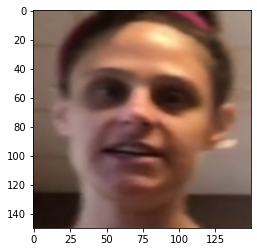

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X[10], interpolation='bicubic')

plt.show()


In [32]:
X[0].shape

(150, 150, 3)

In [214]:
X[0]

array([[[76, 78, 39],
        [75, 77, 38],
        [76, 78, 38],
        ...,
        [70, 71, 40],
        [69, 72, 41],
        [69, 72, 41]],

       [[76, 76, 38],
        [75, 77, 38],
        [76, 78, 38],
        ...,
        [58, 59, 28],
        [58, 59, 28],
        [57, 60, 29]],

       [[73, 71, 33],
        [72, 72, 34],
        [73, 73, 35],
        ...,
        [54, 55, 24],
        [54, 55, 24],
        [54, 55, 24]],

       ...,

       [[78, 73, 43],
        [80, 75, 45],
        [66, 63, 32],
        ...,
        [ 8,  7,  5],
        [ 9,  8,  6],
        [ 8,  7,  5]],

       [[85, 80, 50],
        [84, 79, 49],
        [67, 64, 33],
        ...,
        [11,  7,  6],
        [12,  8,  9],
        [12,  8,  9]],

       [[77, 72, 42],
        [79, 74, 44],
        [65, 62, 31],
        ...,
        [12,  8,  7],
        [13,  9, 10],
        [13,  9, 10]]], dtype=uint8)

In [213]:
X[0].shape

(150, 150, 3)

In [210]:
#test = []
#test.append([1,2])
test.append([3,4])
test

[[1, 2], [3, 4]]

In [33]:
import random
def shuffle(X,y):
    new_train=[]
    for m,n in zip(X,y):
        new_train.append([m,n])
    random.shuffle(new_train)
    X,y=[],[]
    for x in new_train:
        X.append(x[0])
        y.append(x[1])
    return X,y

In [34]:
X,y=shuffle(X,y)
val_X,val_y=shuffle(val_X,val_y)

In [36]:
X[0].shape

(150, 150, 3)

In [56]:
np.savez_compressed('X_y.npz',
                    X = X,
                    y = y,
                    val_X = val_X,
                    val_y = val_y)

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

ELU는 비교적 가장 최근에 나온 함수

ELU 의 특징은 다음과 같다.
- ReLU의 모든 장점을 포함한다.
- "Dying ReLU" 문제를 해결했다.
- 출력값이 거의 zero-centered에 가깝다
- 일반적인 ReLU와 달리 exp함수를 계산하는 비용이 발생한다.

In [38]:
def InceptionLayer(a, b, c, d):
    def func(x):
        x1 = Conv2D(a, (1, 1), padding='same', activation='elu')(x)
        
        x2 = Conv2D(b, (1, 1), padding='same', activation='elu')(x)
        x2 = Conv2D(b, (3, 3), padding='same', activation='elu')(x2)
            
        x3 = Conv2D(c, (1, 1), padding='same', activation='elu')(x)
        x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='elu')(x3)
        
        x4 = Conv2D(d, (1, 1), padding='same', activation='elu')(x)
        x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='elu')(x4)
        y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
        return y
    return func

In [41]:
# input_shape = 영상이라서 3!!!
# 샘플 수를 제외한 입력 형태
def define_model(shape=(256,256,3)):
    x = Input(shape = shape)
    
    x1 = InceptionLayer(1, 4, 4, 2)(x)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
    
    x2 = InceptionLayer(2, 4, 4, 2)(x1)
    x2 = BatchNormalization()(x2)        
    x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
    x3 = Conv2D(16, (5, 5), padding='same', activation = 'elu')(x2)
    x3 = BatchNormalization()(x3)
    x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
    x4 = Conv2D(16, (5, 5), padding='same', activation = 'elu')(x3)
    x4 = BatchNormalization()(x4)
    if shape==(256,256,3):
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
    else:
        x4 = MaxPooling2D(pool_size=(2, 2), padding='same')(x4)
    y = Flatten()(x4)
    y = Dropout(0.5)(y)
    y = Dense(16)(y)
    y = LeakyReLU(alpha=0.1)(y)
    y = Dropout(0.5)(y)
    y = Dense(1, activation = 'sigmoid')(y)
    model=Model(inputs = x, outputs = y)
    Adam = optimizers.Adam(lr=1e-4)
    model.compile(loss='binary_crossentropy',optimizer=Adam)
    #model.summary()
    return model

    
# df_model=define_model()
# df_model.load_weights('../input/meso-pretrain/MesoInception_DF')
# f2f_model=define_model()
# f2f_model.load_weights('../input/meso-pretrain/MesoInception_F2F')

In [21]:
# def define_model(shape=(256,256,3)):
#     x = Input(shape = shape)
    
#     x1 = InceptionLayer(1, 4, 4, 2)(x)
#     x1 = BatchNormalization()(x1)
#     x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
    
#     x2 = InceptionLayer(2, 4, 4, 2)(x1)
#     x2 = BatchNormalization()(x2)        
#     x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
#     x3 = Conv2D(16, (5, 5), padding='same', activation = 'elu')(x2)
#     x3 = BatchNormalization()(x3)
#     x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
#     x4 = Conv2D(16, (5, 5), padding='same', activation = 'elu')(x3)
#     x4 = BatchNormalization()(x4)
#     if shape==(256,256,3):
#         x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
#     else:
#         x4 = MaxPooling2D(pool_size=(2, 2), padding='same')(x4)
#     y = Flatten()(x4)
#     y = Dropout(0.5)(y)
#     y = Dense(16)(y)
#     y = LeakyReLU(alpha=0.1)(y)
#     y = Dropout(0.5)(y)
#     y = Dense(1, activation = 'sigmoid')(y)
#     model=Model(inputs = x, outputs = y)
#     Adam = optimizers.Adam(lr=1e-4)
#     model.compile(loss='mean_squared_error',optimizer=Adam)
#     model.summary()
#     return model
# df_model=define_model()

In [42]:
df_model=define_model()
#df_model.load_weights('../deepfake49/meso_pretrain/MesoInception_DF')
f2f_model=define_model()
#f2f_model.load_weights('../deepfake49/meso_pretrain/MesoInception_F2F')

## Train

In [23]:
# from tensorflow.keras.callbacks import LearningRateScheduler

# # we list out > 25 LRs
# lrs=[1e-2,9e-3,8e-3,7e-3,6e-3,5e-3,4e-3,3e-3,2e-3,
#      1e-3,9e-4,8e-4,7e-4,6e-4,5e-4,4e-4,3e-4,2e-4,
#      1e-4,9e-5,8e-5,7e-5,6e-5,5e-5,4e-5,3e-5,2e-5,
#      1e-5,9e-6,8e-6,7e-6,6e-6,5e-6,4e-6,3e-6,2e-6,
#      1e-6,9e-7,8e-7,7e-7,6e-7,5e-7,4e-7,3e-7,2e-7,
#      1e-7,9e-8,8e-8,7e-8,6e-8,5e-8,4e-8,3e-8,2e-8]
# def schedule(epoch):
#     return lrs[epoch]

In [43]:
from keras.callbacks import LearningRateScheduler
lrs=[1e-3,5e-4,1e-4]
def schedule(epoch):
    return lrs[epoch]

In [44]:
LOAD_PRETRAIN = True # originally True

In [47]:
X[0].shape

(150, 150, 3)

In [49]:
val_X[0].shape

(150, 150, 3)

In [50]:
import gc
kfolds=5
losses=[]
if LOAD_PRETRAIN:
    # import keras.backend as K
    df_models=[]
    f2f_models=[]
    i=0
    while len(df_models)<kfolds:
        model=define_model((150,150,3))
        if i==0:
            model.summary()
        #model.load_weights('../input/meso-pretrain/MesoInception_DF')
        for new_layer, layer in zip(model.layers[1:-8], df_model.layers[1:-8]):
            new_layer.set_weights(layer.get_weights())
        model.fit(np.array(X),np.array(y),epochs=2,callbacks=[LearningRateScheduler(schedule)])
        pred=model.predict(np.array(val_X))
        loss=log_loss(val_y,pred)
        losses.append(loss)
        print('fold '+str(i)+' model loss: '+str(loss))
        df_models.append(model)
        K.clear_session()
        del model
        gc.collect()
        i+=1
    i=0
    while len(f2f_models)<kfolds:
        model=define_model((150,150,3))
        #model.load_weights('../input/meso-pretrain/MesoInception_DF')
        for new_layer, layer in zip(model.layers[1:-8], f2f_model.layers[1:-8]):
            new_layer.set_weights(layer.get_weights())
        model.fit(np.array(X),np.array(y),epochs=2,callbacks=[LearningRateScheduler(schedule)])
        pred=model.predict(np.array(val_X))
        loss=log_loss(val_y,pred)
        losses.append(loss)
        print('fold '+str(i)+' model loss: '+str(loss))
        f2f_models.append(model)
        K.clear_session()
        del model
        gc.collect()
        i+=1
        models=f2f_models+df_models
else:
    models=[]
    i=0
    while len(models)<kfolds:
        model=define_model((150,150,3))
        if i==0:
            model.summary()
        model.fit(np.array(X),np.array(y),epochs=2,callbacks=[LearningRateScheduler(schedule)])
        pred=model.predict(np.array(val_X))
        loss=log_loss(val_y,pred)
        losses.append(loss)
        print('fold '+str(i)+' model loss: '+str(loss))
        if loss<0.68:
            models.append(model)
        else:
            print('loss too bad, retrain!')
        K.clear_session()
        del model
        gc.collect()
        i+=1

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 150, 150, 4)  16          input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 150, 150, 4)  16          input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_85 (Conv2D)              (None, 150, 150, 2)  8           input_6[0][0]                    
____________________________________________________________________________________________

KeyboardInterrupt: 

In [ ]:
# def define_model():
#     model = Sequential(
#         [
#             Conv2D(8, (3, 3), padding="same", activation = 'elu', input_shape=(150, 150, 3)),
#             BatchNormalization(),
#             MaxPooling2D(2, 2),
#             Conv2D(8, (5, 5), padding="same", activation = 'elu'),
#             BatchNormalization(),
#             MaxPooling2D(2, 2),
#             Conv2D(16, (5, 5), padding="same", activation = 'elu'),
#             BatchNormalization(),
#             MaxPooling2D(2, 2),
#             Conv2D(16, (5, 5), padding="same", activation = 'elu'),
#             BatchNormalization(),
#             MaxPooling2D(2, 2),
#             Flatten(),
#             Dropout(0.5),
#             Dense(16,activation='relu'),
#             Dropout(0.5),
#             Dense(1, activation="sigmoid"),
#         ]
#     )
#     Adam = optimizers.Adam(lr=5e-5)
#     model.compile(loss='mean_squared_error',optimizer=Adam)
#     model.summary()
#     return model

In [ ]:
# model=define_model()

# model.fit(np.asarray(X),np.asarray(y),
#           epochs=7,
#           batch_size=100)

In [ ]:
# import gc
# kfolds=5
# losses=[]
# if LOAD_PRETRAIN:
#     # import keras.backend as K
#     df_models=[]
#     f2f_models=[]
#     i=0
#     while len(df_models)<kfolds:
#         model=define_model((150,150,3))
#         if i==0:
#             model.summary()
#         #model.load_weights('../input/meso-pretrain/MesoInception_DF')
#         for new_layer, layer in zip(model.layers[1:-8]):
#             new_layer.set_weights(layer.get_weights())
#         model.fit([X],[y],epochs=25,callbacks=[LearningRateScheduler(schedule)]) #original 2 epochs
#         pred=model.predict([val_X])
#         loss=log_loss(val_y,pred)
#         losses.append(loss)
#         print('fold '+str(i)+' model loss: '+str(loss))
#         df_models.append(model)
#         K.clear_session()
#         del model
#         gc.collect()
#         i+=1
#     i=0
#     while len(f2f_models)<kfolds:
#         model=define_model((150,150,3))
#         #model.load_weights('../input/meso-pretrain/MesoInception_DF')
#         for new_layer, layer in zip(model.layers[1:-8], f2f_model.layers[1:-8]):
#             new_layer.set_weights(layer.get_weights())
#         model.fit([X],[y],epochs=25,callbacks=[LearningRateScheduler(schedule)]) #original 2 epochs
#         pred=model.predict([val_X])
#         loss=log_loss(val_y,pred)
#         losses.append(loss)
#         print('fold '+str(i)+' model loss: '+str(loss))
#         f2f_models.append(model)
#         K.clear_session()
#         del model
#         gc.collect()
#         i+=1
#         models=f2f_models+df_models
# else:
#     models=[]
#     i=0
#     while len(models)<kfolds:
#         model=define_model((150,150,3))
#         if i==0:
#             model.summary()
#         model.fit([X],[y],epochs=50,callbacks=[LearningRateScheduler(schedule)]) #original 2 epochs
#         pred=model.predict([val_X])
#         loss=log_loss(val_y,pred)
#         losses.append(loss)
#         print('fold '+str(i)+' model loss: '+str(loss))
#         if loss<0.68:
#             models.append(model)
#         else:
#             print('loss too bad, retrain!')
#         K.clear_session()
#         del model
#         gc.collect()
#         i+=1

In [27]:
def prediction_pipline(X,two_times=False):
    preds=[]
    for model in tqdm_notebook(models):
        pred=model.predict(np.asarray(X))
        preds.append(pred)
    preds=sum(preds)/len(preds)
    if two_times:
        return larger_range(preds,2)
    else:
        return preds
def larger_range(model_pred,time):
    return (((model_pred-0.5)*time)+0.5)

In [76]:
# np.asarray(X).shape

(24260, 150, 150, 3)

In [61]:
# np.asarray(X).shape

(24260, 150, 150, 3)

In [70]:
# len(val_X)

2516

In [78]:
# np.asarray(val_X).astype('float')

array([[[223, 215, 239],
        [180, 172, 196],
        [182, 172, 196],
        ...,
        [115, 111, 110],
        [111, 107, 106],
        [114, 110, 109]],

       [[219, 211, 235],
        [180, 172, 196],
        [184, 174, 198],
        ...,
        [115, 111, 110],
        [111, 107, 106],
        [105, 101, 100]],

       [[216, 208, 232],
        [181, 173, 197],
        [186, 176, 200],
        ...,
        [116, 112, 113],
        [115, 111, 112],
        [114, 110, 111]],

       ...,

       [[205, 180, 176],
        [206, 181, 177],
        [208, 183, 179],
        ...,
        [ 13,  11,  16],
        [ 18,  11,  18],
        [ 21,  14,  21]],

       [[206, 181, 177],
        [207, 182, 178],
        [208, 183, 179],
        ...,
        [ 17,  14,  21],
        [ 18,  11,  19],
        [ 18,  11,  19]],

       [[210, 185, 181],
        [211, 186, 182],
        [210, 185, 181],
        ...,
        [ 17,  14,  23],
        [ 18,  10,  21],
        [ 18,  10,  21]]

In [73]:
# model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 150, 150, 8)       224       
_________________________________________________________________
batch_normalization_60 (Batc (None, 150, 150, 8)       32        
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 75, 75, 8)         1608      
_________________________________________________________________
batch_normalization_61 (Batc (None, 75, 75, 8)         32        
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 37, 37, 8)         0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 37, 37, 16)       

In [79]:
# model.predict(np.asarray(val_X).astype('float'))

array([[0.42950127],
       [0.42843938],
       [0.45288113],
       ...,
       [0.5168992 ],
       [0.5265028 ],
       [0.52957547]], dtype=float32)

In [28]:
best_model_pred=models[losses.index(min(losses))].predict(np.asarray(val_X))

ValueError: min() arg is an empty sequence

In [29]:
model_pred=prediction_pipline(val_X)

C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


ZeroDivisionError: division by zero

In [88]:
# best_model_pred=models[losses.index(min(losses))].predict(np.asarray(val_X).astype('float'))

ValueError: min() arg is an empty sequence

In [89]:
model_pred=prediction_pipline(np.asarray(val_X).astype('float'))

C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


ZeroDivisionError: division by zero

In [62]:
random_pred=np.random.random(len(val_X))
print('random loss: ' + str(log_loss(val_y,random_pred.clip(0.35,0.65))))
allone_pred=np.array([1 for _ in range(len(val_X))])
print('1 loss: ' + str(log_loss(val_y,allone_pred)))
allzero_pred=np.array([0 for _ in range(len(val_X))])
print('0 loss: ' + str(log_loss(val_y,allzero_pred)))
allpoint5_pred=np.array([0.5 for _ in range(len(val_X))])
print('0.5 loss: ' + str(log_loss(val_y,allpoint5_pred)))

random loss: 0.7303400952914134
1 loss: 17.26978799617044
0 loss: 17.269388197455342
0.5 loss: 0.6931471805599454


In [63]:
print('Simple Averaging Loss: '+str(log_loss(val_y,model_pred.clip(0.35,0.65))))
print('Two Times Larger Range(Averaging) Loss: '+str(log_loss(val_y,larger_range(model_pred,2).clip(0.35,0.65))))
print('Best Single Model Loss: '+str(log_loss(val_y,best_model_pred.clip(0.35,0.65))))
print('Two Times Larger Range(Single Model) Loss: '+str(log_loss(val_y,larger_range(best_model_pred,2).clip(0.35,0.65))))
if log_loss(val_y,model_pred.clip(0.35,0.65))<log_loss(val_y,larger_range(model_pred,2).clip(0.35,0.65)):
    two_times=False
    print('simple averaging is better')
else:
    two_times=True
    print('two times larger range is better')
two_times=False #This is not a bug. I did this intentionally because the model can't get most of the private validation set right(based on LB)

NameError: name 'model_pred' is not defined

In [82]:
import scipy
print(model_pred.clip(0.35,0.65).mean())
print(scipy.stats.median_absolute_deviation(model_pred.clip(0.35,0.65))[0])

NameError: name 'model_pred' is not defined

In [86]:
def check_answers(pred,real,num):
    for i,(x,y) in enumerate(zip(pred,real)):
        correct_incorrect='correct ✅ ' if round(float(x),0)==round(float(y),0) else 'incorrect❌'
        print(correct_incorrect+' prediction: '+str(x[0])+', answer: '+str(y))
        if i>num:
            return
def correct_precentile(pred,real):
    correct=0
    incorrect=0
    for x,y in zip(pred,real):
        if round(float(x),0)==round(float(y),0):
            correct+=1
        else:
            incorrect+=1
    print('number correct: '+str(correct)+', number incorrect: '+str(incorrect))
    print(str(round(correct/len(real)*100,1))+'% correct'+', '+str(round(incorrect/len(real)*100,1))+'% incorrect')
check_answers(model_pred,val_y,15)
correct_precentile(model_pred,val_y)

NameError: name 'model_pred' is not defined

In [ ]:
del X,y,val_X,val_y

In [46]:
MAX_SKIP=10
NUM_FRAME=150
test_dir = '../deepfake-detection-challenge/test_videos/'
filenames = os.listdir(test_dir)
prediction_filenames = filenames
test_video_files = [test_dir + x for x in filenames]
detector = MTCNN()
def detect_face(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    final = []
    detected_faces_raw = detector.detect_faces(img)
    if detected_faces_raw==[]:
        #print('no faces found')
        return []
    confidences=[]
    for n in detected_faces_raw:
        x,y,w,h=n['box']
        final.append([x,y,w,h])
        confidences.append(n['confidence'])
    if max(confidences)<0.9:
        return []
    max_conf_coord=final[confidences.index(max(confidences))]
    #return final
    return max_conf_coord
def crop(img,x,y,w,h):
    x-=40
    y-=40
    w+=80
    h+=80
    if x<0:
        x=0
    if y<=0:
        y=0
    return cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w],(150,150)),cv2.COLOR_BGR2RGB)
def detect_video(video):
    v_cap = cv2.VideoCapture(video)
    v_cap.set(1, NUM_FRAME)
    success, vframe = v_cap.read()
    vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
    bounding_box=detect_face(vframe)
    if bounding_box==[]:
        count=0
        current=NUM_FRAME
        while bounding_box==[] and count<MAX_SKIP:
            current+=1
            v_cap.set(1,current)
            success, vframe = v_cap.read()
            vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
            bounding_box=detect_face(vframe)
            count+=1
        if bounding_box==[]:
            print('no faces found')
            prediction_filenames.remove(video.replace('../deepfake-detection-challenge/test_videos/',''))
            return None
    x,y,w,h=bounding_box
    v_cap.release()
    return crop(vframe,x,y,w,h)
test_X = []
for video in tqdm_notebook(test_video_files):
    x=detect_video(video)
    if x is None:
        continue
    test_X.append(x)

C:\Users\smhrd02\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:59: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found
no faces found



In [ ]:
MAX_SKIP=10
NUM_FRAME=150
test_dir = './testMp4/'
filenames = os.listdir(test_dir)
prediction_filenames = filenames
test_video_files = [test_dir + x for x in filenames]
detector = MTCNN()
def detect_face(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    final = []
    detected_faces_raw = detector.detect_faces(img)
    if detected_faces_raw==[]:
        #print('no faces found')
        return []
    confidences=[]
    for n in detected_faces_raw:
        x,y,w,h=n['box']
        final.append([x,y,w,h])
        confidences.append(n['confidence'])
    if max(confidences)<0.9:
        return []
    max_conf_coord=final[confidences.index(max(confidences))]
    #return final
    return max_conf_coord
def crop(img,x,y,w,h):
    x-=40
    y-=40
    w+=80
    h+=80
    if x<0:
        x=0
    if y<=0:
        y=0
    return cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w],(150,150)),cv2.COLOR_BGR2RGB)
def detect_video(video):
    v_cap = cv2.VideoCapture(video)
    v_cap.set(1, NUM_FRAME)
    success, vframe = v_cap.read()
    vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
    bounding_box=detect_face(vframe)
    if bounding_box==[]:
        count=0
        current=NUM_FRAME
        while bounding_box==[] and count<MAX_SKIP:
            current+=1
            v_cap.set(1,current)
            success, vframe = v_cap.read()
            vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
            bounding_box=detect_face(vframe)
            count+=1
        if bounding_box==[]:
            print('no faces found')
            prediction_filenames.remove(video.replace('./testMp4/',''))
            return None
    x,y,w,h=bounding_box
    v_cap.release()
    return crop(vframe,x,y,w,h)
test_X = []
for video in tqdm_notebook(test_video_files):
    x=detect_video(video)
    if x is None:
        continue
    test_X.append(x)

In [61]:
model.predict(test_X)

IndexError: list index out of range

In [48]:
len(test_X)

400

In [50]:
len(model.predict(test_X))

ValueError: Error when checking input: expected input_4 to have 4 dimensions, but got array with shape (150, 150, 3)

In [56]:
model.predict(np.asarray(test_X).astype('float'))

ValueError: Error when checking input: expected input_4 to have 4 dimensions, but got array with shape (400, 1)

In [32]:
df_test=pd.read_csv('../deepfake-detection-challenge/sample_submission.csv')
df_test['label']=0.5
preds=prediction_pipline(test_X,two_times=two_times).clip(0.35,0.65)
for pred,name in zip(preds,prediction_filenames):
    name=name.replace('../deepfake-detection-challenge/test_videos/','')
    df_test.iloc[list(df_test['filename']).index(name),1]=pred

NameError: name 'two_times' is not defined

In [39]:
print(preds.clip(0.35,0.65).mean())
print(scipy.stats.median_absolute_deviation(preds.clip(0.35,0.65))[0])
print(preds[:10])

NameError: name 'preds' is not defined

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('submission1.csv',index=False)

In [36]:
pd.read_csv('../deepfake-detection-challenge/sample_submission.csv')

,filename,label
0,aassnaulhq.mp4,0
1,aayfryxljh.mp4,0
2,acazlolrpz.mp4,0
3,adohdulfwb.mp4,0
4,ahjnxtiamx.mp4,0
...,...,...
395,ztyvglkcsf.mp4,0
396,zuwwbbusgl.mp4,0
397,zxacihctqp.mp4,0
398,zyufpqvpyu.mp4,0


In [43]:
len(test_X)

355